In [1]:
pip install rdkit --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary modules
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import FragmentCatalog
from rdkit.Chem import rdMolTransforms
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole
%matplotlib 

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
# 1. Create molecule from SMILES
smiles = "CC(=O)NC1=CC=C(C=C1)O"  # Paracetamol
mol = Chem.MolFromSmiles(smiles)
print(mol)

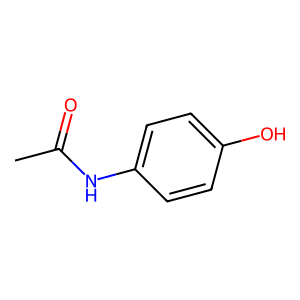

In [4]:
# Generate image of the molecule
img = Draw.MolToImage(mol)
img

In [5]:
# 2. Convert molecule to SMILES
smiles_string = Chem.MolToSmiles(mol)
print("SMILES:", smiles_string)


SMILES: CC(=O)Nc1ccc(O)cc1


In [6]:
# 3. Get molecular weight
mol_weight = Descriptors.ExactMolWt(mol)
print("Molecular Weight:", mol_weight)

Molecular Weight: 151.063328528


In [7]:
# 4. Count atoms
num_atoms = mol.GetNumAtoms()
print("Number of atoms:", num_atoms)

Number of atoms: 11


In [8]:
# 5. Count heavy atoms
num_heavy_atoms = mol.GetNumHeavyAtoms()
print("Number of heavy atoms:", num_heavy_atoms)

Number of heavy atoms: 11


In [9]:
 # 6. Get atom symbols
atom_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
print("Atom symbols:", atom_symbols)

Atom symbols: ['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'O']


In [10]:
# 7. Count bonds
num_bonds = mol.GetNumBonds()
print("Number of bonds:", num_bonds)

Number of bonds: 11


In [11]:
# 8. Get bond types
bond_types = [bond.GetBondType().name for bond in mol.GetBonds()]
print("Bond types:", bond_types)

Bond types: ['SINGLE', 'DOUBLE', 'SINGLE', 'SINGLE', 'AROMATIC', 'AROMATIC', 'AROMATIC', 'AROMATIC', 'AROMATIC', 'SINGLE', 'AROMATIC']


In [12]:
# 9. Calculate LogP
logp = Descriptors.MolLogP(mol)
print("LogP:", logp)

LogP: 1.3505999999999998


In [13]:
# 10. Calculate TPSA
tpsa = Descriptors.TPSA(mol)
print("TPSA:", tpsa)

TPSA: 49.33


In [14]:
# 11. Add hydrogens
mol_with_h = Chem.AddHs(mol)
print("Atoms after adding H:", mol_with_h.GetNumAtoms())

Atoms after adding H: 20


In [15]:
# 12. Remove hydrogens
mol_without_h = Chem.RemoveHs(mol_with_h)
print("Atoms after removing H:", mol_without_h.GetNumAtoms())

Atoms after removing H: 11


In [16]:
# 13. Generate 2D coordinates

# Compute 2D coordinates
AllChem.Compute2DCoords(mol)
# Get the 2D coordinates
coords = mol.GetConformer().GetPositions()
# Print the 2D coordinates
for atom_idx, coord in enumerate(coords):
    print(f"Atom {atom_idx}: {coord}")

Atom 0: [-4.23132883 -0.2779591   0.        ]
Atom 1: [-2.78244009  0.11026947  0.        ]
Atom 2: [-2.39421153  1.5591582   0.        ]
Atom 3: [-1.72177992 -0.95039071  0.        ]
Atom 4: [-0.27289118 -0.56216214  0.        ]
Atom 5: [0.11533738 0.8867266  0.        ]
Atom 6: [1.56422612 1.27495517 0.        ]
Atom 7: [2.6248863 0.214295  0.       ]
Atom 8: [ 2.23665773 -1.23459374  0.        ]
Atom 9: [ 0.78776899 -1.62282231  0.        ]
Atom 10: [4.07377504 0.60252356 0.        ]


In [17]:
# 14. Convert to InChI
inchi = Chem.MolToInchi(mol)
print("InChI:", inchi)

InChI: InChI=1S/C8H9NO2/c1-6(10)9-7-2-4-8(11)5-3-7/h2-5,11H,1H3,(H,9,10)


In [19]:
# 15. Convert to InChIKey
inchikey = Chem.MolToInchiKey(mol)
print("InChIKey:", inchikey)

InChIKey: RZVAJINKPMORJF-UHFFFAOYSA-N


In [20]:
# 16. Count rotatable bonds
rotatable_bonds = rdMolDescriptors.CalcNumRotatableBonds(mol)
print("Rotatable bonds:", rotatable_bonds)

Rotatable bonds: 1


In [21]:
# 17. Get ring count
ring_count = rdMolDescriptors.CalcNumRings(mol)
print("Number of rings:", ring_count)

Number of rings: 1


In [22]:
# 18. Check aromaticity
aromatic_atoms = [atom.GetIsAromatic() for atom in mol.GetAtoms()]
print("Aromatic atoms:", aromatic_atoms)

Aromatic atoms: [False, True, True, True, True, False, True, True, False, False, False]


In [23]:
# 19. Get formal charges
formal_charges = [atom.GetFormalCharge() for atom in mol.GetAtoms()]
print("Formal charges:", formal_charges)

Formal charges: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
# 20. Calculate molecular formula
mol_formula = rdMolDescriptors.CalcMolFormula(mol)
print("Molecular formula:", mol_formula)

Molecular formula: C8H9NO2


In [25]:
# 21. Get atomic numbers
atomic_numbers = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
print("Atomic numbers:", atomic_numbers)

Atomic numbers: [6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8]


In [26]:
# 22. Calculate exact mass
exact_mass = rdMolDescriptors.CalcExactMolWt(mol)
print("Exact mass:", exact_mass)

Exact mass: 151.063328528


In [27]:
from rdkit.Chem import rdFingerprintGenerator
# 23. Generate Morgan fingerprint
# Create a Morgan fingerprint generator with radius 2 and fingerprint size 2048
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
# Generate the Morgan fingerprint for the molecule
morgan_fp = mfpgen.GetFingerprint(mol)
# Print the first 50 bits of the fingerprint (for brevity)
print("Morgan fingerprint:", morgan_fp.ToBitString()[:50] + "...")

Morgan fingerprint: 00000000000000000000000000000000000000000000000000...


In [28]:
# 24. Generate MACCS keys
maccs = AllChem.GetMACCSKeysFingerprint(mol)
print("MACCS keys:", maccs.ToBitString()[:50] + "...")

MACCS keys: 00000000000000000000000000000000000000000000000000...


In [29]:
# 25. Get chiral centers
chiral_centers = Chem.FindMolChiralCenters(mol)
print("Chiral centers:", chiral_centers)

Chiral centers: []


In [30]:
# 26. Calculate number of H-bond donors
hbd = rdMolDescriptors.CalcNumHBD(mol)
print("H-bond donors:", hbd)

H-bond donors: 2


In [31]:
# 27. Calculate number of H-bond acceptors
hba = rdMolDescriptors.CalcNumHBA(mol)
print("H-bond acceptors:", hba)

H-bond acceptors: 2


In [32]:
# 28. Get valence electrons
valence_electrons = [atom.GetTotalValence() for atom in mol.GetAtoms()]
print("Valence electrons:", valence_electrons)

Valence electrons: [4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2]


In [33]:
# 29. Create another molecule for comparison
mol2 = Chem.MolFromSmiles("CC(=O)O")  # Acetic acid
print(mol2)

In [34]:
# 30. Find maximum common substructure
mcs = rdFMCS.FindMCS([mol, mol2])
print(mcs)
print("MCS SMARTS:", mcs.smartsString)

MCS SMARTS: [#6]-[#6]-[#8]


In [35]:
# 31. Get hybridization states
hybridization = [atom.GetHybridization().name for atom in mol.GetAtoms()]
print("Hybridization states:", hybridization)

Hybridization states: ['SP3', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2', 'SP2']


In [36]:
# 32. Get implicit valence
implicit_valence = [atom.GetImplicitValence() for atom in mol.GetAtoms()]
print("Implicit valence:", implicit_valence)

Implicit valence: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
# 33. Get explicit valence
explicit_valence = [atom.GetExplicitValence() for atom in mol.GetAtoms()]
print("Explicit valence:", explicit_valence)

Explicit valence: [4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2]


In [38]:
# 34. Calculate molar refractivity
molar_refractivity = Descriptors.MolMR(mol)
print("Molar refractivity:", molar_refractivity)

Molar refractivity: 43.50460000000002


In [39]:
# 35. Get aromatic ring count
aromatic_rings = rdMolDescriptors.CalcNumAromaticRings(mol)
print("Aromatic rings:", aromatic_rings)

Aromatic rings: 1


In [40]:
# 36. Get aliphatic ring count
aliphatic_rings = rdMolDescriptors.CalcNumAliphaticRings(mol)
print("Aliphatic rings:", aliphatic_rings)

Aliphatic rings: 0


In [41]:
# 37. Get ring sizes
ring_info = mol.GetRingInfo()
ring_sizes = [len(ring) for ring in ring_info.AtomRings()]
print("Ring sizes:", ring_sizes)

Ring sizes: [6]


In [42]:
# 38. Calculate Balaban J index
balaban = Descriptors.BalabanJ(mol)
print("Balaban J index:", balaban)

Balaban J index: 2.9065977916543706


In [43]:
# 39. Calculate Bertz complexity
bertz = Descriptors.BertzCT(mol)
print("Bertz complexity:", bertz)

Bertz complexity: 259.92547657141216


In [44]:

# 40. Get symmetry classes
symmetry_classes = Chem.CanonicalRankAtoms(mol)
print("Symmetry classes:", symmetry_classes)
print("Symmetry classes:", list(symmetry_classes))

Symmetry classes: <rdkit.rdBase._vectj object at 0x1366968c0>
Symmetry classes: [0, 5, 6, 3, 4, 8, 10, 9, 7, 1, 2]


In [45]:
# 41. Generate topological fingerprint
topological_fp = AllChem.RDKFingerprint(mol)
print("Topological fingerprint:", topological_fp.ToBitString()[:50] + "...")

Topological fingerprint: 00001001000000000100000000000100000000000000000000...


In [46]:
# 42. Calculate fraction of sp3 carbons
fsp3 = rdMolDescriptors.CalcFractionCSP3(mol)
print("Fraction of sp3 carbons:", fsp3)

Fraction of sp3 carbons: 0.125


In [47]:

# 43. Get conjugated systems
# Detect conjugated atoms using aromaticity (conjugated rings)
aromatic_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetIsAromatic()]

# Detect conjugated bonds (alternating single and double bonds in chains)
conjugated_bonds = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType()) for bond in mol.GetBonds() 
                    if bond.GetBondType() in [Chem.BondType.DOUBLE, Chem.BondType.SINGLE]]

# Output results
print("Aromatic (conjugated) atoms:", aromatic_atoms)
print("Conjugated bonds (alternating single and double):")
for bond in conjugated_bonds:
    print(f"Bond between atoms {bond[0]} and {bond[1]} of type {bond[2]}")


Aromatic (conjugated) atoms: [1, 2, 3, 4, 6, 7]
Conjugated bonds (alternating single and double):
Bond between atoms 0 and 5 of type SINGLE
Bond between atoms 5 and 8 of type DOUBLE
Bond between atoms 5 and 9 of type SINGLE
Bond between atoms 6 and 8 of type SINGLE
Bond between atoms 7 and 10 of type SINGLE


In [48]:
# 44. Calculate charge
total_charge = sum(atom.GetFormalCharge() for atom in mol.GetAtoms())
print("Total charge:", total_charge)

Total charge: 0


In [49]:
# 45. Generate 3D coordinates
mol_3d = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol_3d)
AllChem.MMFFOptimizeMolecule(mol_3d)

0

In [50]:
# 46. Get distance matrix
dist_matrix = Chem.Get3DDistanceMatrix(mol_3d)
print("Distance matrix shape:", dist_matrix.shape)

Distance matrix shape: (20, 20)


In [51]:
# 47. Get degree of atoms
atom_degrees = [atom.GetDegree() for atom in mol.GetAtoms()]
print("Atom degrees:", atom_degrees)

Atom degrees: [1, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1]


In [52]:
# 48. Calculate van der Waals volume
vdw_volume = Descriptors.NumValenceElectrons(mol)
print("Van der Waals volume:", vdw_volume)

Van der Waals volume: 58


In [53]:
# 49. Get isotopes
isotopes = [atom.GetIsotope() for atom in mol.GetAtoms()]
print("Isotopes:", isotopes)

Isotopes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [54]:
# 50. Save molecule as image
Draw.MolToFile(mol, "molecule.png")
print("Molecule image saved as 'molecule.png'")

Molecule image saved as 'molecule.png'
